In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import os

import pandas as pd

2024-08-06 08:55:19.086809: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 08:55:19.361521: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-06 08:55:20.189127: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.10.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:
2024-08-06 08:55:20.189364: W tensorflow/compiler/xla/stre

In [76]:
# Plot setting

vanilla_64 = "gold"
pk_64 = "darkorange"
vanilla_128 = "mediumpurple"
pk_128 = "rebeccapurple"
vanilla_256 = "yellowgreen"
pk_256 = "forestgreen"



ref_color = "black"
exact_color = "darkred"



label_font = 24
ticks_font = 22
legend_font = 24
linewidth = 2.5
title_font = 16

pk_linestyle = "solid"
vanilla_linestyle = 'dashed'

pk_marker = '*'
vanilla_marker = 'p'

linear_markevery = 70
bilinear_markevery = 80
pk_markevery = 50
vanilla_markevery = 60

In [69]:
weights_path = 'kdv_results/weights/check_vanilla'

In [70]:
Nx = 64

In [37]:
file_path = os.path.join(weights_path, 'check_vanilla_' + str(Nx) + '.npy')
results_dict = np.load(file_path, allow_pickle=True).item()

pk_kdv_opt_momentum_5 = results_dict['pk_kdv_opt_momentum_5']
vanilla_kdv_opt_momentum_5 = results_dict['vanilla_kdv_opt_momentum_5']
momentum_ref = results_dict['momentum_ref']
pk_t_list_momentum_5 = results_dict['pk_t_list_momentum_5']
vanilla_t_list_momentum_5 = results_dict['vanilla_t_list_momentum_5']

In [44]:
pk_kdv_opt_momentum_5_list = []
vanilla_kdv_opt_momentum_5_list = []
pk_t_list_momentum_5_list = []
vanilla_t_list_momentum_5_list = []
pk_results_nit_list = []
vanilla_results_nit_list = []
pk_time_per_iter_list = []
vanilla_time_per_iter_list = []


for Nx in [64, 128, 256]:
    file_path = os.path.join(weights_path, 'check_vanilla_' + str(Nx) + '.npy')
    results_dict = np.load(file_path, allow_pickle=True).item()

    pk_kdv_opt_momentum_5 = results_dict['pk_kdv_opt_momentum_5']
    vanilla_kdv_opt_momentum_5 = results_dict['vanilla_kdv_opt_momentum_5']
    momentum_ref = results_dict['momentum_ref']
    pk_t_list_momentum_5 = results_dict['pk_t_list_momentum_5']
    vanilla_t_list_momentum_5 = results_dict['vanilla_t_list_momentum_5']


    vanilla_csv_file = os.path.join(weights_path, 'opt_results_vanilla_' + str(Nx) + '.csv')
    pk_csv_file = os.path.join(weights_path, 'opt_results_pk_' + str(Nx) + '.csv')

    vanilla_results = pd.read_csv(vanilla_csv_file)
    pk_results = pd.read_csv(pk_csv_file)


    pk_results_nit = np.asarray(list(pk_results['nit'])[:-1]) 
    vanilla_results_nit = np.asarray(list(vanilla_results['nit'])[:-1])

    pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
    vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit

    pk_kdv_opt_momentum_5_list.append(pk_kdv_opt_momentum_5)
    vanilla_kdv_opt_momentum_5_list.append(vanilla_kdv_opt_momentum_5)
    pk_t_list_momentum_5_list.append(pk_t_list_momentum_5)
    vanilla_t_list_momentum_5_list.append(vanilla_t_list_momentum_5)
    pk_results_nit_list.append(pk_results_nit)
    vanilla_results_nit_list.append(vanilla_results_nit)
    pk_time_per_iter_list.append(pk_time_per_iter)
    vanilla_time_per_iter_list.append(vanilla_time_per_iter)
    

        

/tmp/ipykernel_4165282/20215701.py:32: RuntimeWarning: divide by zero encountered in divide
  pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
/tmp/ipykernel_4165282/20215701.py:33: RuntimeWarning: divide by zero encountered in divide
  vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit
/tmp/ipykernel_4165282/20215701.py:32: RuntimeWarning: divide by zero encountered in divide
  pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
/tmp/ipykernel_4165282/20215701.py:33: RuntimeWarning: divide by zero encountered in divide
  vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit
/tmp/ipykernel_4165282/20215701.py:32: RuntimeWarning: divide by zero encountered in divide
  pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
/tmp/ipykernel_4165282/20215701.py:33: RuntimeWarning: divide by zero encountered in divide
  vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit


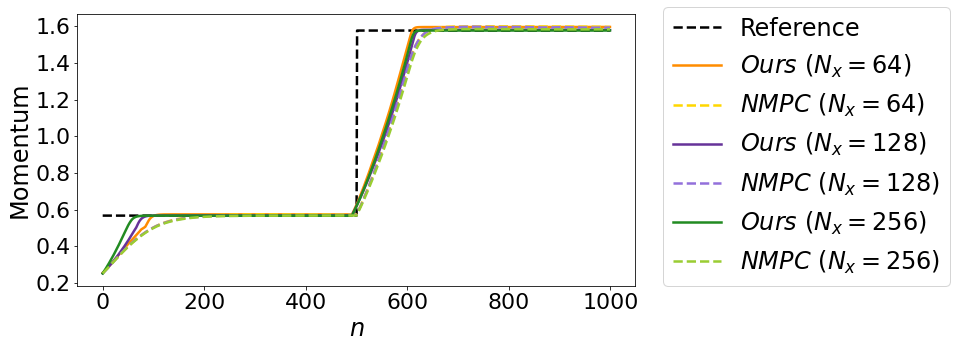

In [77]:

plt.figure(figsize=(10, 5))
plt.plot(momentum_ref, label="Reference", linestyle="--", color=ref_color, linewidth=linewidth)

plt.plot(
    pk_kdv_opt_momentum_5_list[0],
    label=r"$Ours \ (N_{x}=64)$",
    color=pk_64, 
    linestyle=pk_linestyle, 
    linewidth=linewidth,
    # marker=pk_marker,
    # markevery= pk_markevery +10,
    # markersize=10
)

plt.plot(
    vanilla_kdv_opt_momentum_5_list[0],
    label=r"$NMPC \ (N_{x}=64)$",
    color=vanilla_64,
    linestyle=vanilla_linestyle,
    linewidth=linewidth,
    # marker=vanilla_marker,
    # markevery= vanilla_markevery+20,
    # markersize=10
)

plt.plot(
    pk_kdv_opt_momentum_5_list[1],
    label=r"$Ours \ (N_{x}=128)$",
    color=pk_128, 
    linestyle=pk_linestyle, 
    linewidth=linewidth,
    # marker=pk_marker,
    # markevery= pk_markevery +30,
    # markersize=10
)

plt.plot(
    vanilla_kdv_opt_momentum_5_list[1],
    label=r"$NMPC \ (N_{x}=128)$",
    color=vanilla_128,
    linestyle=vanilla_linestyle,
    linewidth=linewidth,
    # marker=vanilla_marker,
    # markevery= vanilla_markevery+40,
    # markersize=10
    )

plt.plot(
    pk_kdv_opt_momentum_5_list[2],
    label=r"$Ours \ (N_{x}=256)$",
    color=pk_256, 
    linestyle=pk_linestyle, 
    linewidth=linewidth,
    # marker=pk_marker,
    # markevery= pk_markevery +50,
    # markersize=10
)

plt.plot(
    vanilla_kdv_opt_momentum_5_list[2],
    label=r"$NMPC \ (N_{x}=256)$",
    color=vanilla_256,
    linestyle=vanilla_linestyle,
    linewidth=linewidth,
    # marker=vanilla_marker,
    # markevery= vanilla_markevery+60,
    # markersize=10
)

plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.xlabel(r"$n$", fontsize=label_font)
plt.ylabel("Momentum", fontsize=label_font)
plt.legend(fontsize=legend_font, loc=(1.05, 0.001))

In [39]:
vanilla_csv_file = os.path.join(weights_path, 'opt_results_vanilla_' + str(Nx) + '.csv')
pk_csv_file = os.path.join(weights_path, 'opt_results_pk_' + str(Nx) + '.csv')

vanilla_results = pd.read_csv(vanilla_csv_file)
pk_results = pd.read_csv(pk_csv_file)


pk_results_nit = np.asarray(list(pk_results['nit'])[:-1]) 
vanilla_results_nit = np.asarray(list(vanilla_results['nit'])[:-1])

pk_time_per_iter = pk_t_list_momentum_5 / pk_results_nit
vanilla_time_per_iter = vanilla_t_list_momentum_5 / vanilla_results_nit

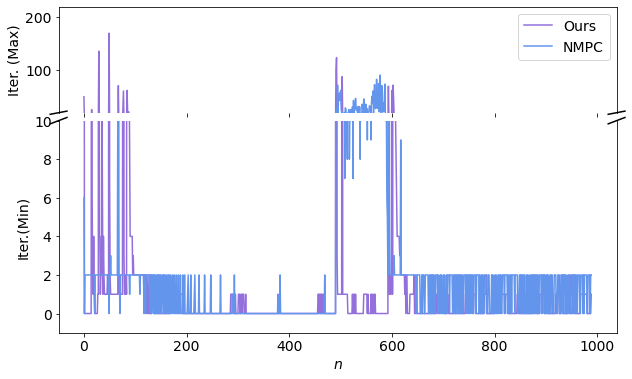

In [41]:
label_font = 14

max_max_value = tf.reduce_max(pk_results_nit) + 50
min_max_value = 20
max_min_value = 10
min_min_value = -1

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_results_nit, label='Ours', color=pk_curve)
ax.plot(vanilla_results_nit, label='NMPC', color=vanilla_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_results_nit, label='Ours', color=pk_curve)
ax2.plot(vanilla_results_nit, label='NMPC', color=vanilla_curve)
ax2.set_ylim(min_min_value, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)
ax.set_ylabel('Iter. (Max)', fontsize=label_font)
ax2.set_ylabel('Iter.(Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)


# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_iter.pdf'), dpi=200, bbox_inches='tight')




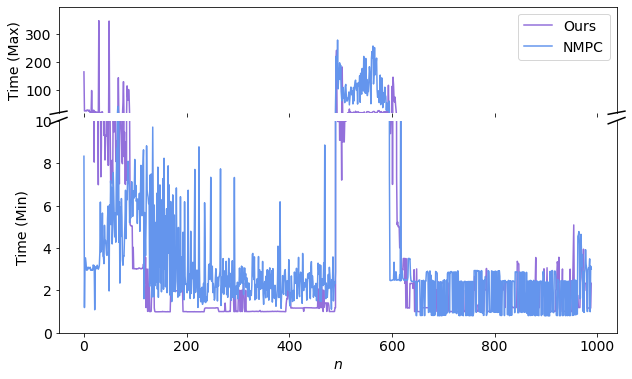

In [42]:
label_font = 14

max_max_value = tf.reduce_max(pk_t_list_momentum_5) + 50
min_max_value = 20
max_min_value = 10

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.05})

# Main plot
ax.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax.plot(vanilla_t_list_momentum_5, label='NMPC', color=vanilla_curve)
ax.set_ylim(min_max_value, max_max_value)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # Hide the top tick labels
ax.legend(fontsize=label_font)

# Subplot for emphasizing lower values
ax2.plot(pk_t_list_momentum_5, label='Ours', color=pk_curve)
ax2.plot(vanilla_t_list_momentum_5, label='NMPC', color=vanilla_curve)
ax2.set_ylim(0, max_min_value)
ax2.spines['top'].set_visible(False)
# ax2.legend(fontsize=label_font)

plt.xticks(fontsize=label_font)
plt.yticks(fontsize=label_font)

# Add break indicators (here using small diagonal slashes)
d = .015  # size of the diagonal slashes
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left corner
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right corner

kwargs.update(transform=ax2.transAxes)  # switch to the second (sub) axis
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left corner
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right corner

plt.xlabel(r'$n$', fontsize=label_font)
ax.set_ylabel('Time (Max)', fontsize=label_font)
ax2.set_ylabel('Time (Min)', fontsize=label_font)

ax.tick_params(axis='x', labelsize=label_font)
ax.tick_params(axis='y', labelsize=label_font)
ax2.tick_params(axis='y', labelsize=label_font)

# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.png'), dpi=200, bbox_inches='tight')
# plt.savefig(os.path.join(figures_path, 'kdv_'+forcing_type+'_momentum_t_list.pdf'), dpi=200, bbox_inches='tight')




In [35]:
print('pk', np.mean(pk_t_list_momentum_5))
print('vanilla', np.mean(vanilla_t_list_momentum_5))


pk 6.967541116072266
vanilla 12.895163281742555


In [ ]:
pk_t_max_list = []
pk_t_min_list = []
pk_t_mean_list = []
vanilla_t_max_list = []
vanilla_t_min_list = []
vanilla_t_mean_list = []



In [84]:
momentum_ref.shape

TensorShape([1000, 1])